In [74]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Number of tickers in data: 247
Data from 2013-03-25 to 2023-07-14
Number of tickers after filtering by minimum number of observations: 123
Number of tickers after filtering by final date: 123


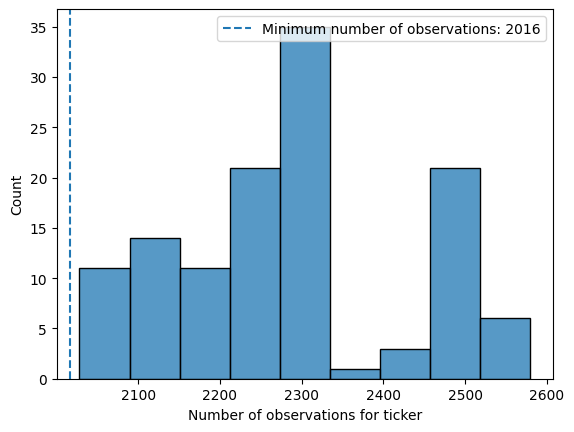

df_prices.shape=(2580, 123)
2013 year: 197 observations (31/123)
2014 year: 250 observations (122/123)
2015 year: 250 observations (123/123)
2016 year: 252 observations (123/123)
2017 year: 252 observations (123/123)
2018 year: 254 observations (123/123)
2019 year: 252 observations (123/123)
2020 year: 250 observations (123/123)
2021 year: 255 observations (123/123)
2022 year: 234 observations (123/123)
2023 year: 134 observations (123/123)


ZILL: 100%|██████████| 123/123 [00:22<00:00,  5.53it/s] 


load_data: 25.0 s


In [82]:
from library.load import load_data, TRADING_DAYS_IN_YEAR

stat = load_data(verbose=True)

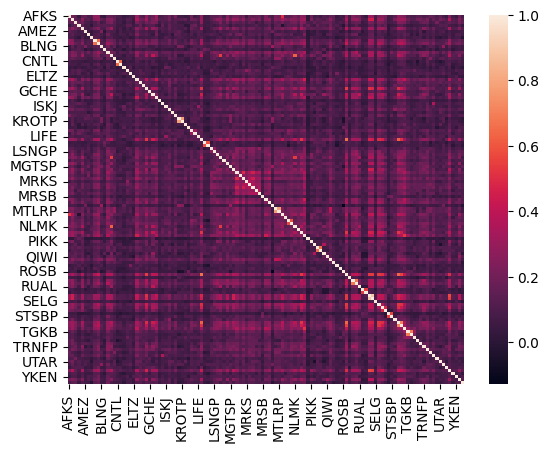

In [76]:
sns.heatmap(stat.Sigma_corr)
plt.show()

In [77]:
sharpe = stat.mean_returns / stat.std_returns
highest_ratio = sharpe.quantile(0.9)
highest_ratio

0.05049081588766199

In [78]:
# mask = stat.mean_returns.index[np.where(sharpe >= highest_ratio)]
# stat.mean_returns[mask] = stat.std_returns[mask] * highest_ratio

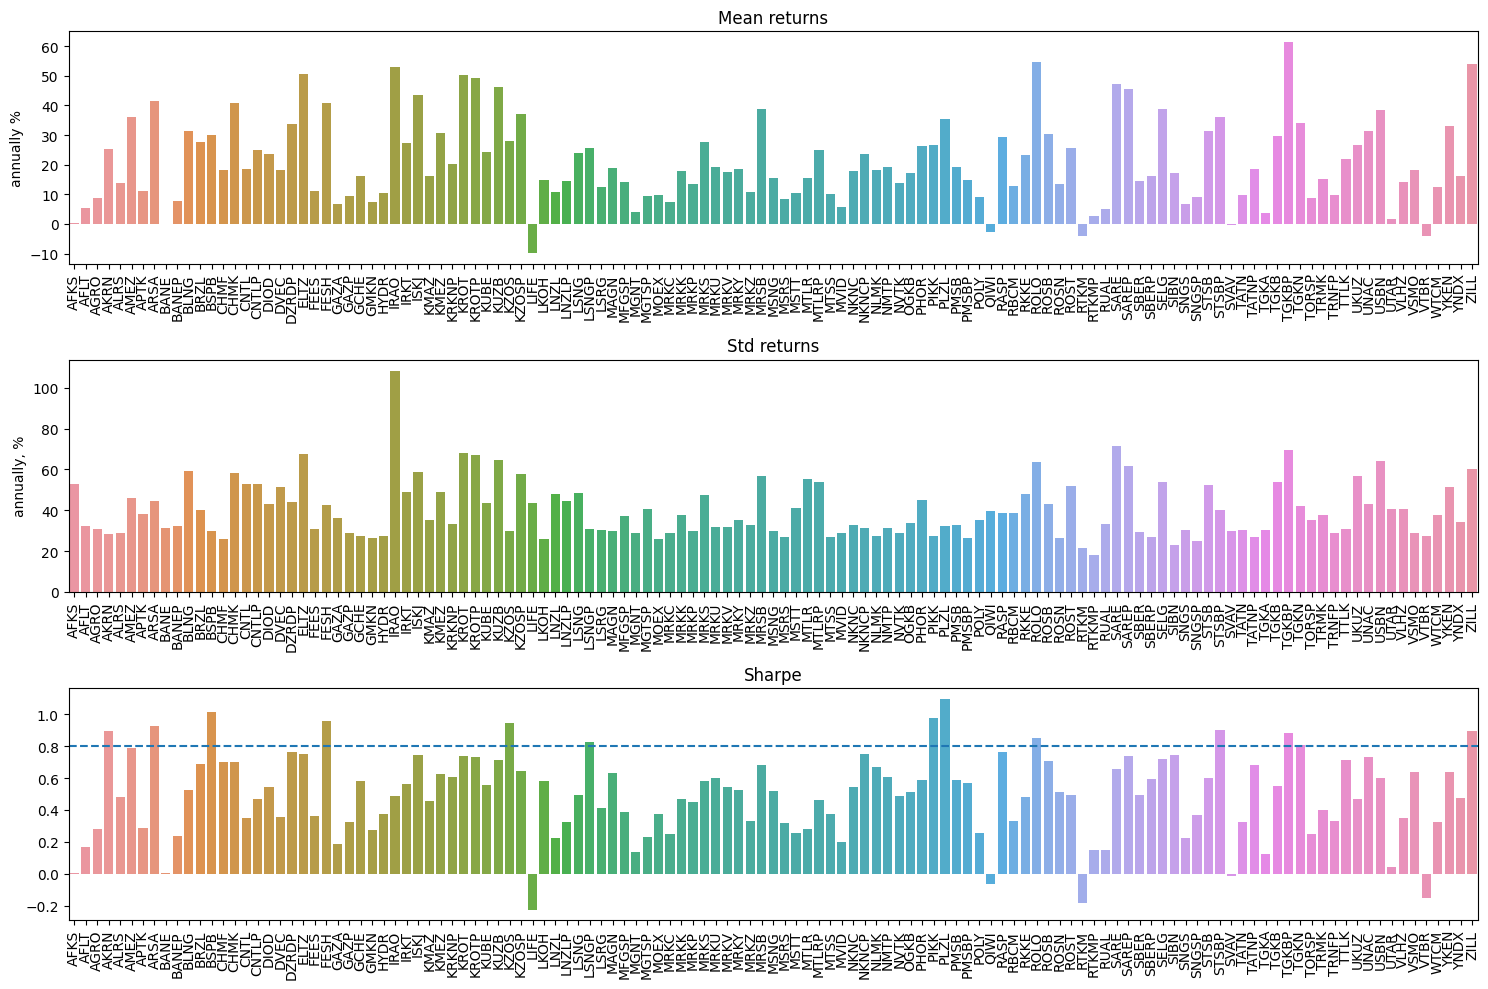

In [85]:
def plot_series(s: pd.Series, title: str, ylabel: str | None = None):
    sns.barplot(x=s.index, y=s)
    plt.xticks(rotation=90)
    plt.ylabel(ylabel)
    plt.title(title)


annual_mean_returns = stat.mean_returns * TRADING_DAYS_IN_YEAR * 100
annual_std_returns = stat.std_returns * np.sqrt(TRADING_DAYS_IN_YEAR) * 100
plt.subplots(3, 1, figsize=(15, 10))
plt.subplot(3, 1, 1)
plot_series(annual_mean_returns, 'Mean returns', 'annually %')
plt.subplot(3, 1, 2)
plot_series(annual_std_returns, 'Std returns', 'annually, %')
plt.subplot(3, 1, 3)
plot_series(annual_mean_returns / annual_std_returns, 'Sharpe')
plt.axhline(highest_ratio * np.sqrt(TRADING_DAYS_IN_YEAR), linestyle='--')
plt.tight_layout()
plt.show()

In [103]:
stat.std_returns.values.shape

(123,)

Optimization time: 0.03 s. n_assets=124
Optimization time: 0.03 s. n_assets=124
Optimization time: 0.02 s. n_assets=124
mu=10: bonds=93.3%, stocks=6.7%
mu=20: bonds=60.3%, stocks=39.7%
mu=30: bonds=27.0%, stocks=73.0%


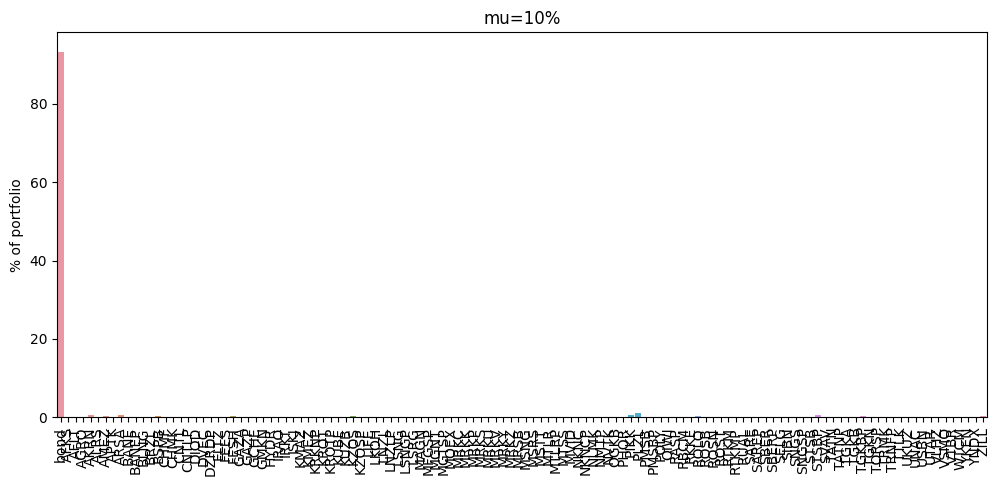

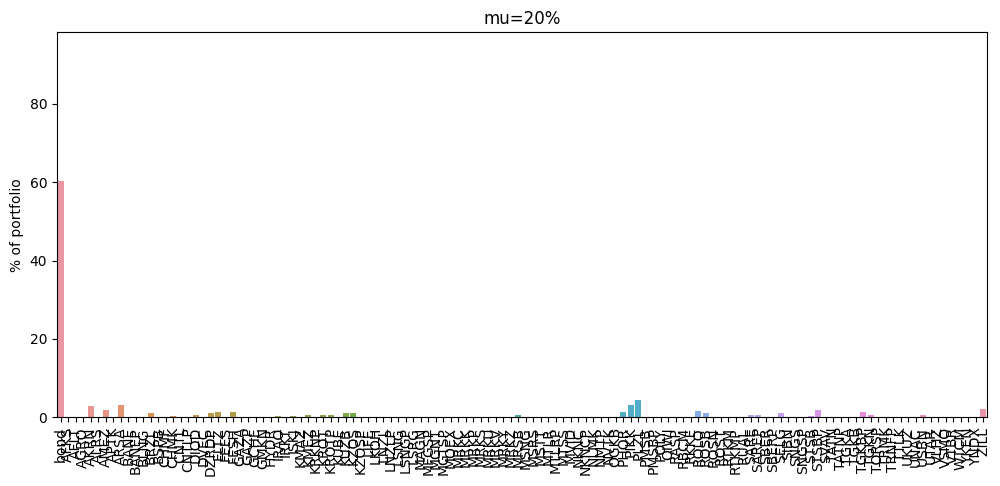

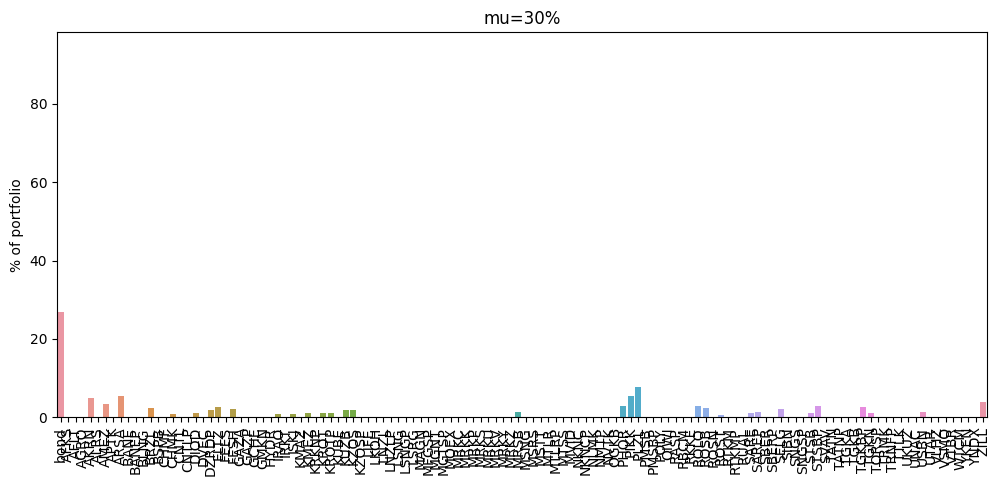

In [109]:
from library.markowitz import get_markowitz_w


def plot_w(w: pd.Series):
    plt.figure(figsize=(12, 5))
    sns.barplot(x=w.index, y=w)
    plt.ylabel('% of portfolio')
    plt.xticks(rotation=90)


mu_s = [10, 20, 30]
BOND_YEAR_RETURN_PCT = 8.0
BOND_YEAR_RETURN_STD_PCT = 2.0
BOND_RETURN_CORR = 0.2

w_s = [get_markowitz_w(stat, bond_year_return_pct=BOND_YEAR_RETURN_PCT, bond_year_return_std_pct=BOND_YEAR_RETURN_STD_PCT, bond_share_corr=BOND_RETURN_CORR, mu_year_pct=mu) for mu in mu_s]

for mu, w in zip(mu_s, w_s):
    print(f'mu={mu}: bonds={w["bond"]:.1%}, stocks={1-w["bond"]:.1%}')

y_max = min(np.max(w_s) * 100 + 5, 100)
for i, (w, mu) in enumerate(zip(w_s, mu_s)):
    plot_w(w * 100)
    plt.title(f'mu={mu}%')
    plt.ylim(0, y_max)
    plt.show()